In [16]:
import math
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import pandas as pd
import json
import gcol

In [6]:
def euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def generate_positions(graph, blockade=7.5):
    positions = {}
    placed_nodes = set()

    first_node = list(graph.keys())[0]
    positions[first_node] = (0, 0)
    placed_nodes.add(first_node)

    def find_position(node):
        candidate_position = None
        valid_position = False
        while not valid_position:
            angle = random.randrange(360)
            x = blockade*math.cos(math.radians(angle))
            y = blockade*math.sin(math.radians(angle))
            candidate_position = (x, y)
            valid_position = True
            for neighbor in placed_nodes:
                if neighbor in graph[node]:
                    dist = euclidean(candidate_position, positions[neighbor])
                    if dist > blockade or candidate_position in positions.values():
                        valid_position = False
                        break
                else:
                    dist = euclidean(candidate_position, positions[neighbor])
                    if dist <= blockade or candidate_position in positions.values():
                        valid_position = False
                        break
            if valid_position:
                return candidate_position

    for node in graph:
        if node not in placed_nodes:
            new_position = find_position(node)
            positions[node] = new_position
            placed_nodes.add(node)

    min_x = min(x for x, _ in positions.values())
    min_y = min(y for _, y in positions.values())

    if min_x < 0 or min_y < 0:
        shift_x = abs(min_x) if min_x < 0 else 0
        shift_y = abs(min_y) if min_y < 0 else 0
        positions = {node: (x + shift_x, y + shift_y) for node, (x, y) in positions.items()}

    return [i for i in positions.values()]

In [7]:
graph = {
    'A': {'B': 1, 'C': 1},
    'B': {'A': 1, 'C': 1, 'D': 1},
    'C': {'A': 1, 'B': 1, 'D': 1},
    'D': {'B': 1, 'C': 1, 'D': 1},
}
positions = generate_positions(graph)
print(positions)
with open("graph.pickle", "wb") as file:
    pickle.dump(positions, file)

[(5.114987700468739, 7.481730376948683), (0.0, 1.9965776148049041), (6.417349032970714, 0.09567222935712216), (5.638161253549678, 0.0)]


In [ ]:
# Load your JSON file
with open(r"\Users\sirer\OneDrive\Desktop\cdProjects\Quantum\yquantum-2025-travelers-capgemini\LACountyFireHazardLevel.json") as file:
    full_data = json.load(file)

success


In [11]:
# Step 1: Process the data to get centroids
centroids = {}

for idx, feature in enumerate(full_data['features']):
    attributes = feature.get('attributes', {})
    geometry = feature.get('geometry', {})

    if 'rings' in geometry and geometry['rings']:
        points = geometry['rings'][0]
        num_points = len(points)

        avg_lon = sum(p[0] for p in points) / num_points
        avg_lat = sum(p[1] for p in points) / num_points
        hazard_level = attributes.get('HAZ_CLASS', 'Unknown')

        centroids[idx + 1] = (hazard_level, avg_lat, avg_lon)

In [ ]:
# Step 2: Compute Euclidean distances between all pairs
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

distance_matrix = {}

for id1, attributes1 in centroids.items():
    hazard_level1 = attributes1[0]
    coord1 = (attributes1[1], attributes1[2])
    if(hazard_level1 not in distance_matrix.keys()):
        distance_matrix[hazard_level1] = {}
    distance_matrix[hazard_level1][id1] = {}
    for id2, attributes2 in centroids.items():
        hazard_level2 = attributes2[0]
        coord2 = (attributes2[1], attributes2[2])
        if id1 != id2 and hazard_level1 == hazard_level2:
            distance_matrix[hazard_level1][id1][id2] = euclidean_distance(coord1, coord2)

# Result: distance_matrix is your dictionary of dictionaries!

In [19]:
epselon = 0.01

moderateGraph = {}
for id1 in distance_matrix["Moderate"].keys():
    for id2 in distance_matrix["Moderate"][id1].keys():
        dist = distance_matrix["Moderate"][id1][id2]
        if(dist < epselon):
            if(id1 not in moderateGraph.keys()):
                moderateGraph[id1] = {}
            if(id2 not in moderateGraph[id1].keys()):
                moderateGraph[id1][id2] = 1
            


highGraph = {}
for id1 in distance_matrix["High"].keys():
    for id2 in distance_matrix["High"][id1].keys():
        dist = distance_matrix["High"][id1][id2]
        if(dist < epselon):
            if(id1 not in highGraph.keys()):
                highGraph[id1] = {}
            if(id2 not in highGraph[id1].keys()):
                highGraph[id1][id2] = 1



veryHighGraph = {}
for id1 in distance_matrix["Very High"].keys():
    for id2 in distance_matrix["Very High"][id1].keys():
        dist = distance_matrix["Very High"][id1][id2]
        if(dist < epselon):
            if(id1 not in veryHighGraph.keys()):
                veryHighGraph[id1] = {}
            if(id2 not in veryHighGraph[id1].keys()):
                veryHighGraph[id1][id2] = 1

print("moderate neighbors:", len(moderateGraph.keys()))
print("high neighbors:", len(highGraph.keys()))
print("very high neighbors:", len(veryHighGraph.keys()))

moderate neighbors: 18
high neighbors: 61
very high neighbors: 532


Here is a node coloring of moderate graph: {561: 0, 562: 1, 563: 2, 564: 3, 565: 4, 566: 5, 560: 6, 549: 0, 199: 0, 201: 1, 198: 1, 202: 0, 20: 0, 21: 1, 24: 0, 26: 1, 31: 0, 32: 1}
Here is a node coloring of high graph: {187: 0, 188: 1, 189: 2, 190: 3, 191: 4, 186: 5, 63: 0, 558: 0, 551: 1, 556: 2, 559: 3, 550: 1, 49: 1, 552: 0, 548: 0, 483: 0, 488: 1, 484: 2, 485: 3, 494: 1, 478: 0, 498: 0, 55: 0, 51: 1, 53: 2, 56: 1, 461: 0, 463: 1, 471: 1, 472: 2, 464: 0, 477: 0, 469: 1, 470: 1, 537: 0, 536: 1, 543: 1, 42: 0, 43: 1, 44: 0, 45: 1, 61: 0, 184: 1, 180: 0, 181: 1, 182: 0, 183: 1, 208: 0, 209: 1, 434: 0, 435: 1, 473: 0, 474: 1, 512: 0, 519: 1, 515: 0, 522: 1, 545: 0, 546: 1, 555: 0, 557: 1}
Here is a node coloring of very high graph: {384: 0, 149: 1, 809: 2, 812: 3, 813: 4, 814: 5, 815: 6, 816: 7, 818: 8, 820: 9, 821: 10, 822: 11, 823: 12, 824: 13, 825: 14, 827: 15, 829: 16, 830: 17, 831: 18, 832: 19, 833: 20, 834: 21, 835: 22, 836: 23, 838: 24, 839: 25, 842: 26, 853: 27, 860: 28, 382: 

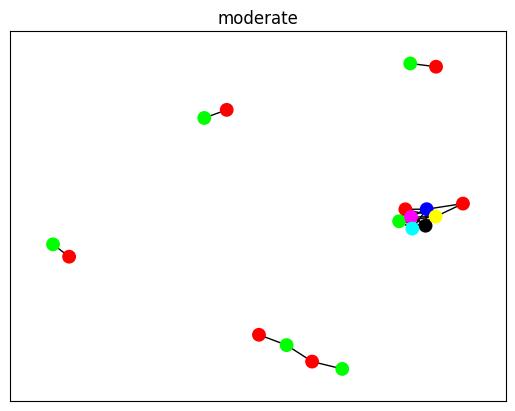

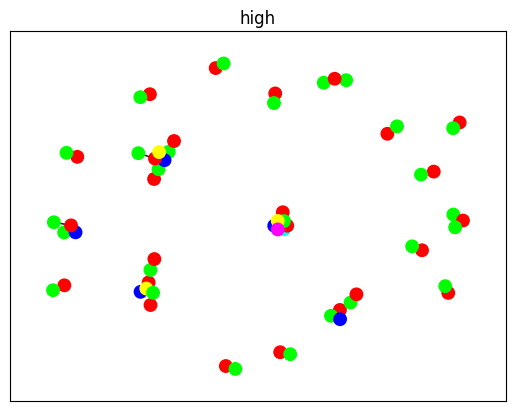

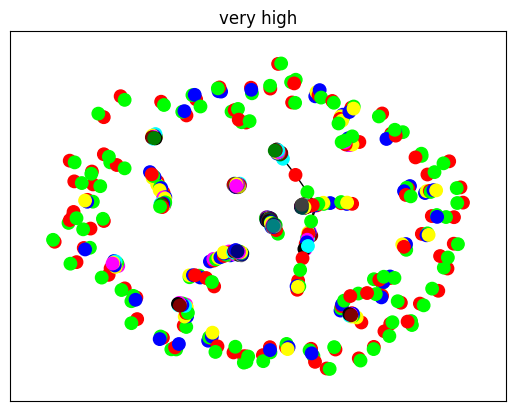

In [31]:
MG = nx.Graph(moderateGraph)
HG = nx.Graph(highGraph)
VHG = nx.Graph(veryHighGraph)
cMG = gcol.node_coloring(MG, opt_alg=1)
cHG = gcol.node_coloring(HG, opt_alg=1)
cVHG = gcol.node_coloring(VHG, opt_alg=1)

print("Here is a node coloring of moderate graph:", cMG)
print("Here is a node coloring of high graph:", cHG)
print("Here is a node coloring of very high graph:", cVHG)
plt.figure(1)
plt.title("moderate")
nx.draw_networkx(MG,
                 pos=nx.spring_layout(MG, seed=3),
                 node_color=gcol.get_node_colors(MG, cMG, gcol.colorful),
                 with_labels=False,
                 node_size=80)
plt.figure(2)
plt.title("high")
nx.draw_networkx(HG,
                 pos=nx.spring_layout(HG, seed=3),
                 node_color=gcol.get_node_colors(HG, cHG, gcol.colorful),
                 with_labels=False,
                 node_size=80)
plt.figure(3)
plt.title("very high")
nx.draw_networkx(VHG,
                 pos=nx.spring_layout(VHG, seed=3),
                 node_color=gcol.get_node_colors(VHG, cVHG, gcol.colorful),
                 with_labels=False,
                 node_size=80)
plt.show()

Here is a node coloring of graph G: {187: 0, 188: 1, 189: 2, 190: 3, 191: 4, 186: 5, 63: 0, 558: 0, 551: 1, 556: 2, 559: 3, 550: 1, 49: 1, 552: 0, 548: 0, 483: 0, 488: 1, 484: 2, 485: 3, 494: 1, 478: 0, 498: 0, 55: 0, 51: 1, 53: 2, 56: 1, 461: 0, 463: 1, 471: 1, 472: 2, 464: 0, 477: 0, 469: 1, 470: 1, 537: 0, 536: 1, 543: 1, 42: 0, 43: 1, 44: 0, 45: 1, 61: 0, 184: 1, 180: 0, 181: 1, 182: 0, 183: 1, 208: 0, 209: 1, 434: 0, 435: 1, 473: 0, 474: 1, 512: 0, 519: 1, 515: 0, 522: 1, 545: 0, 546: 1, 555: 0, 557: 1}


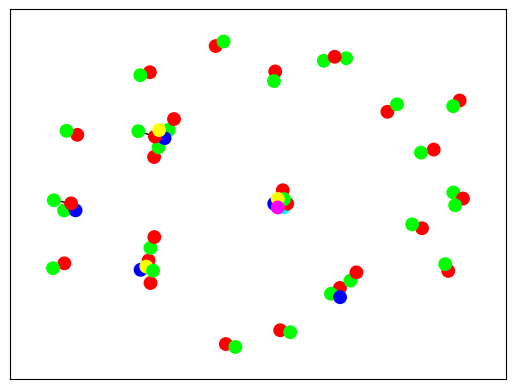

In [21]:
G = nx.Graph(highGraph)
c = gcol.node_coloring(G, opt_alg=1)

print("Here is a node coloring of graph G:", c)
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=3),
                 node_color=gcol.get_node_colors(G, c, gcol.colorful),
                 with_labels=False,
                 node_size=80)
plt.show()

Here is a node coloring of graph G: {384: 0, 149: 1, 809: 2, 812: 3, 813: 4, 814: 5, 815: 6, 816: 7, 818: 8, 820: 9, 821: 10, 822: 11, 823: 12, 824: 13, 825: 14, 827: 15, 829: 16, 830: 17, 831: 18, 832: 19, 833: 20, 834: 21, 835: 22, 836: 23, 838: 24, 839: 25, 842: 26, 853: 27, 860: 28, 382: 29, 888: 2, 885: 30, 883: 31, 889: 1, 890: 3, 416: 1, 808: 11, 873: 0, 896: 4, 388: 5, 386: 6, 875: 7, 897: 8, 899: 9, 880: 10, 852: 14, 901: 11, 902: 12, 900: 13, 894: 15, 898: 16, 675: 14, 882: 2, 892: 17, 150: 1, 674: 0, 392: 1, 844: 0, 859: 1, 861: 2, 872: 3, 387: 4, 837: 5, 845: 6, 846: 7, 847: 8, 848: 9, 849: 10, 850: 11, 851: 12, 858: 13, 865: 14, 866: 15, 867: 16, 868: 17, 869: 18, 870: 19, 856: 20, 826: 21, 840: 22, 841: 23, 863: 24, 877: 25, 878: 26, 879: 27, 855: 21, 857: 22, 854: 20, 843: 14, 337: 4, 864: 0, 862: 1, 730: 0, 724: 1, 728: 2, 729: 3, 761: 4, 725: 5, 727: 6, 731: 7, 760: 8, 763: 9, 733: 10, 734: 11, 757: 1, 758: 3, 755: 12, 753: 9, 740: 8, 743: 13, 759: 10, 723: 4, 377: 8, 

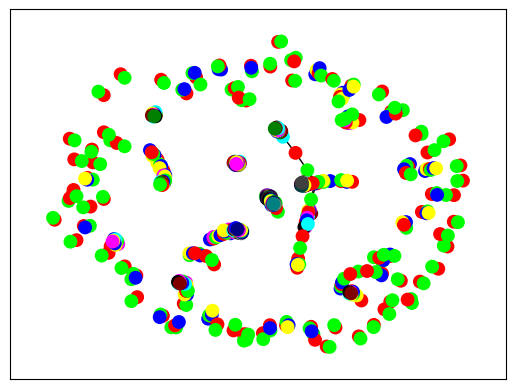

In [22]:
G = nx.Graph(veryHighGraph)
c = gcol.node_coloring(G, opt_alg=1)

print("Here is a node coloring of graph G:", c)
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=3),
                 node_color=gcol.get_node_colors(G, c, gcol.colorful),
                 with_labels=False,
                 node_size=80)
plt.show()